# ***Retention study - Figuring Out Which Employees May Quit***

Loading our MAIN HR Database Records

In [1]:
import pandas as pd

hr_df = pd.read_csv("/content/hr_data.csv")

# Preview the first 5 records of the dataframe
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [2]:
# Preview the last 5 records of the dataframe.
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [3]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [4]:
# Display value in categorical columns
print(hr_df["department"].unique())
print(hr_df["salary"].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [5]:
# How many rows and columns are in our dataset?
hr_df.shape # (rows, columns)

(14999, 9)

## ***Loading our Evaluation and Employee Satisfaction Data***

In [6]:
emp_stais_eval = pd.read_excel("/content/employee_satisfaction_evaluation.xlsx")

# Preview the first 5 rows of the new dataframe
emp_stais_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [7]:
# How many rows and columns are in our new dataframe
emp_stais_eval.shape # (Rows, Columns)

(14999, 3)

## ***Merge or Join Tables***

In [8]:
main_df = hr_df.set_index('employee_id').join(emp_stais_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


## ***Is our dataset good? Are there any missing values?***

In [9]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


Let's fill in the missing blanks with the average values

In [10]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [12]:
main_df[main_df.employee_id == 81315]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
13925,81315,3,133,3,0,0,0,sales,medium,0.61283,0.75


In [13]:
# Remove employee ID
main_df_final = main_df.drop(columns='employee_id')

In [14]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [15]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [16]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## ***Correlation Matrix***

No handles with labels found to put in legend.


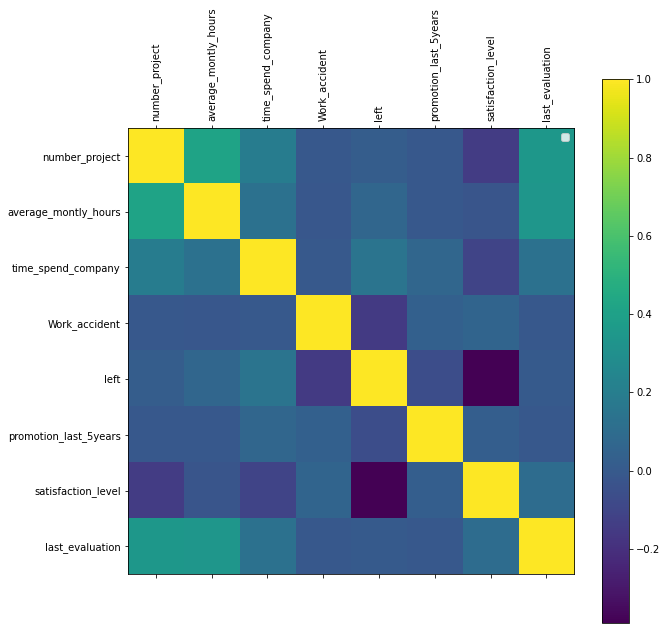

In [17]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
  '''
  Function plots a graphical correlation matrix for each pair of columns in the dataframe

  Input:
      df: pandas Dataframe
      size: vertical and horizontal size of of the plot
  '''

  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
  plt.yticks(range(len(corr.columns)), corr.columns)


plot_corr(main_df_final)

## ***Preparing out Dataset for Machine Learning***

In [18]:
# Preform One Hot Encoding on Categorical Data

categorial = ['department', 'salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [19]:
# How many employees in the dataset have left?

len(main_df_final.loc[main_df_final.left == 1])

3571

In [20]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'], axis=1).values

# We assigned those labels values to our Y dataset
y = main_df_final['left']

# Split it to a 70:30 ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# Normalize the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.153892,1.347787,0.350116,-0.417122,-0.14765,1.356124,-1.336922,-0.238262,-0.233084,-0.220311,-0.211122,-0.248364,-0.250089,-0.618056,2.393769,-0.473228,-0.976744,1.155728
1,0.153892,0.628901,-1.029195,-0.417122,-0.14765,1.275770,-0.515332,-0.238262,-0.233084,-0.220311,-0.211122,-0.248364,-0.250089,1.617977,-0.417751,-0.473228,1.023809,-0.865256
2,0.965805,0.149643,0.350116,-0.417122,-0.14765,-1.737484,-0.280592,-0.238262,-0.233084,-0.220311,-0.211122,-0.248364,-0.250089,1.617977,-0.417751,-0.473228,-0.976744,1.155728
3,2.589631,1.068220,0.350116,-0.417122,-0.14765,-2.018721,1.303904,-0.238262,-0.233084,-0.220311,-0.211122,-0.248364,-0.250089,-0.618056,2.393769,-0.473228,1.023809,-0.865256
4,-1.469935,-1.328067,1.729426,-0.417122,-0.14765,0.190999,0.071519,-0.238262,-0.233084,-0.220311,-0.211122,4.026348,-0.250089,-0.618056,-0.417751,-0.473228,-0.976744,1.155728


In [23]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-1.246127e-15,-1.742476e-16,3.870289e-16,3.917028e-16,5.710262e-19,2.037999e-14,2.757323e-14,-1.571908e-17,-5.383667e-16,5.082081e-16,-1.053432e-15,-1.288351e-16,-9.418972e-16,6.955734e-16,1.643287e-16,2.483858e-16,1.113924e-16,1.293692e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.469935e+00,-2.106860e+00,-1.029195e+00,-4.171221e-01,-1.476499e-01,-2.099075e+00,-2.099827e+00,-2.382625e-01,-2.330841e-01,-2.203109e-01,-2.111224e-01,-2.483640e-01,-2.500885e-01,-6.180557e-01,-4.177513e-01,-4.732282e-01,-9.767443e-01,-8.652558e-01
25%,-6.580216e-01,-9.087165e-01,-3.395398e-01,-4.171221e-01,-1.476499e-01,-6.928891e-01,-9.261266e-01,-2.382625e-01,-2.330841e-01,-2.203109e-01,-2.111224e-01,-2.483640e-01,-2.500885e-01,-6.180557e-01,-4.177513e-01,-4.732282e-01,-9.767443e-01,-8.652558e-01
50%,1.538915e-01,-1.010911e-02,-3.395398e-01,-4.171221e-01,-1.476499e-01,1.508221e-01,1.283354e-02,-2.382625e-01,-2.330841e-01,-2.203109e-01,-2.111224e-01,-2.483640e-01,-2.500885e-01,-6.180557e-01,-4.177513e-01,-4.732282e-01,-9.767443e-01,-8.652558e-01
75%,9.658046e-01,8.884983e-01,3.501156e-01,-4.171221e-01,-1.476499e-01,8.338265e-01,8.931087e-01,-2.382625e-01,-2.330841e-01,-2.203109e-01,-2.111224e-01,-2.483640e-01,-2.500885e-01,1.617977e+00,-4.177513e-01,-4.732282e-01,1.023809e+00,1.155728e+00
max,2.589631e+00,2.166518e+00,4.488048e+00,2.397380e+00,6.772779e+00,1.557008e+00,1.656014e+00,4.197052e+00,4.290298e+00,4.539040e+00,4.736588e+00,4.026348e+00,3.998584e+00,1.617977e+00,2.393769e+00,2.113145e+00,1.023809e+00,1.155728e+00


## ***Train the Logistic Regression Model***

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def train_test(ML_model):
  model = ML_model()
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)

  print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
  print(confusion_matrix(y_test, predictions))
  print(classification_report(y_test, predictions))


train_test(LogisticRegression)

Accuracy 78.20%
[[3161  263]
 [ 718  358]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.87      3424
           1       0.58      0.33      0.42      1076

    accuracy                           0.78      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



## ***Train the Random Forest Classifier***

In [25]:
from sklearn.ensemble import RandomForestClassifier

train_test(RandomForestClassifier)

Accuracy 98.76%
[[3417    7]
 [  49 1027]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3424
           1       0.99      0.95      0.97      1076

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



## ***Train the Deep Learning Model***

In [26]:
%tensorflow_version 2.x

In [27]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = 'relu', input_dim = 18))
model.add(Dense(1, kernel_initializer = "uniform", activation = 'sigmoid'))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [28]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [29]:
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.5340 - accuracy: 0.7659 - val_loss: 0.3693 - val_accuracy: 0.7609
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3498 - accuracy: 0.7975 - val_loss: 0.3127 - val_accuracy: 0.8700
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2988 - accuracy: 0.8826 - val_loss: 0.2774 - val_accuracy: 0.9122
Epoch 4/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2631 - accuracy: 0.9205 - val_loss: 0.2577 - val_accuracy: 0.9193
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2437 - accuracy: 0.9221 - val_loss: 0.2452 - val_accuracy: 0.9220
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2328 - accuracy: 0.9279 - val_loss: 0.2339 - val_accuracy: 0.9256
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2301 - accuracy: 0.9281 - val_loss: 0.2271 - val_accuracy:

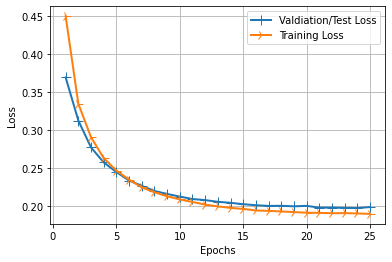

In [30]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Valdiation/Test Loss")
line2 = plt.plot(epochs, loss_values, label = "Training Loss")
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

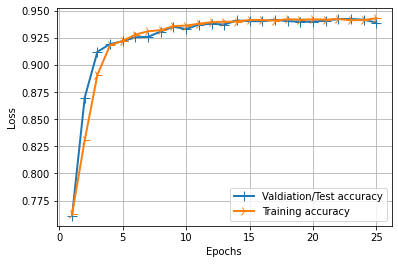

In [31]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Valdiation/Test accuracy")
line2 = plt.plot(epochs, loss_values, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

## ***Displaying the Classification Report and the Confusion Matrix***

In [32]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3262  162]
 [ 112  964]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3424
           1       0.86      0.90      0.88      1076

    accuracy                           0.94      4500
   macro avg       0.91      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500



## ***Deeper Model***

In [33]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden layer 1
model2.add(Dense(100, activation='relu', input_dim = 18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden layer 2
model2.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1900      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


## ***Training our Deeper Model***

In [34]:
batch_size = 32
epochs = 25

history = model2.fit(X_train,
                     y_train,
                     epochs = epochs,
                     batch_size = batch_size,
                     verbose = 1,
                     validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
329/329 [==============================] - 2s 3ms/step - loss: 1.2577 - accuracy: 0.7748 - val_loss: 0.3915 - val_accuracy: 0.9284
Epoch 2/25
329/329 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.9185 - val_loss: 0.2665 - val_accuracy: 0.9462
Epoch 3/25
329/329 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.9340 - val_loss: 0.2377 - val_accuracy: 0.9507
Epoch 4/25
329/329 [==============================] - 1s 2ms/step - loss: 0.2487 - accuracy: 0.9462 - val_loss: 0.2345 - val_accuracy: 0.9500
Epoch 5/25
329/329 [==============================] - 1s 2ms/step - loss: 0.2383 - accuracy: 0.9470 - val_loss: 0.2207 - val_accuracy: 0.9518
Epoch 6/25
329/329 [==============================] - 1s 2ms/step - loss: 0.2320 - accuracy: 0.9478 - val_loss: 0.2165 - val_accuracy: 0.9529
Epoch 7/25
329/329 [==============================] - 1s 2ms/step - loss: 0.2346 - accuracy: 0.9442 - val_loss: 0.2109 - val_accuracy: 0.9524
Epoch 

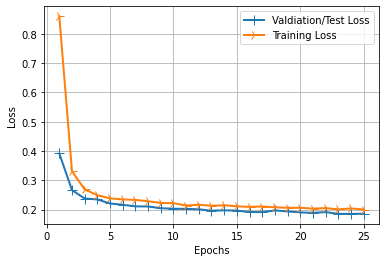

In [35]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Valdiation/Test Loss")
line2 = plt.plot(epochs, loss_values, label = "Training Loss")
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

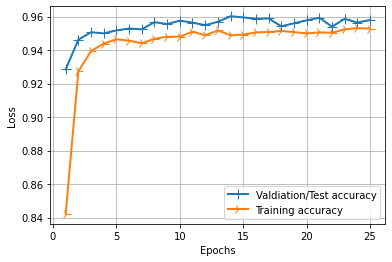

In [36]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Valdiation/Test accuracy")
line2 = plt.plot(epochs, loss_values, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

## ***Final model + Feature importances***

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.80%
[[3416    8]
 [  46 1030]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3424
           1       0.99      0.96      0.97      1076

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [69]:
main_df_final.drop(["left"], axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [71]:
import pandas as pd

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                   columns =['importance']).sort_values('importance', ascending = False)

feature_importances

,importance
5,0.326595
0,0.177552
2,0.175158
1,0.153222
6,0.121090
3,0.011957
16,0.008785
15,0.004001
13,0.003813
17,0.003639
